In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import matplotlib.dates as mdates 
import calendar

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [156]:
# Clean data
df2 = df[df['value'] >= df['value'].quantile(0.025)]
df2 = df2[df2['value'] <= df['value'].quantile(0.975)]
df = df2
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


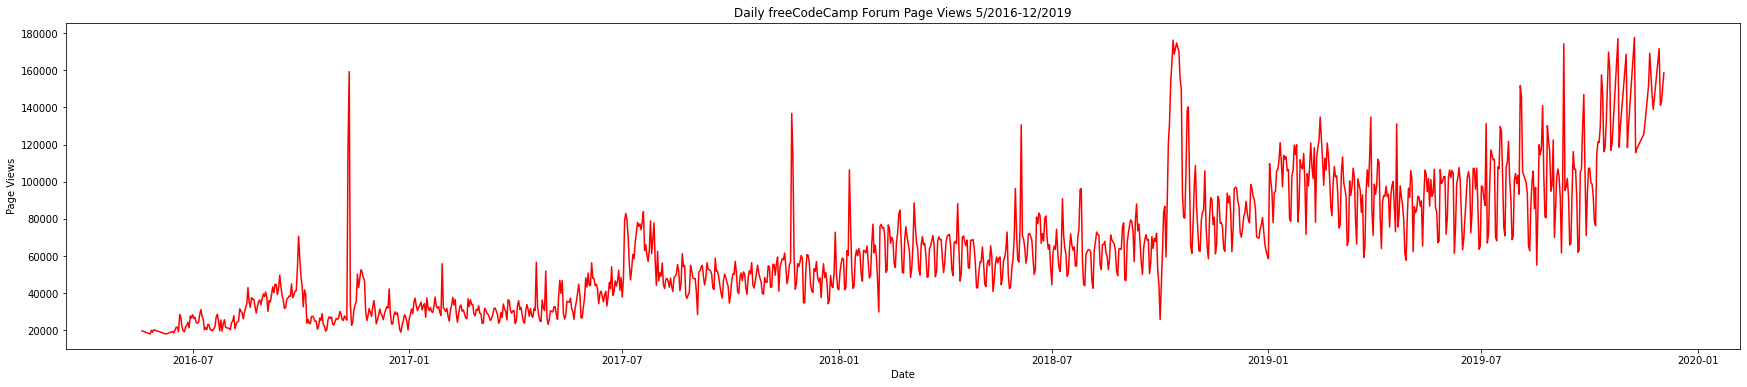

In [5]:
fig, ax = plt.subplots(figsize = (30, 6))
ax.set(title = "Daily freeCodeCamp Forum Page Views 5/2016-12/2019", xlabel = 'Date', ylabel = 'Page Views')
ax.plot(df2, 'r')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) 

In [ ]:
def draw_line_plot():
    # Draw line plot 
    fig, ax = plt.subplots(figsize = (30, 6))
    ax.set(title = "Daily freeCodeCamp Forum Page Views 5/2016-12/2019", xlabel = 'Date', ylabel = 'Page Views')
    ax.plot(df2, 'r')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) 

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

In [10]:
df_bar = df2.copy()
df_bar['year'] = df2.index.year
df_bar['month'] = df2.index.month
df_bar['month'] = df_bar['month']

df_bar = df_bar.groupby(['year', 'month']).mean()
df_bar

value
year month               
2016 5       19432.400000
     6       21875.105263
     7       24109.678571
     8       31049.193548
     9       41476.866667
     10      27398.322581
     11      40448.633333
     12      27832.419355
2017 1       32785.161290
     2       31113.071429
     3       29369.096774
     4       30878.733333
     5       34244.290323
     6       43577.500000
     7       65806.838710
     8       47712.451613
     9       47376.800000
     10      47438.709677
     11      57701.566667
     12      48420.580645
2018 1       58580.096774
     2       65679.000000
     3       62693.774194
     4       62350.833333
     5       56562.870968
     6       70117.000000
     7       63591.064516
     8       62831.612903
     9       65941.733333
     10     111378.142857
     11      78688.333333
     12      80047.483871
2019 1      102056.516129
     2      105968.357143
     3       91214.483871
     4       89368.433333
     5       91439.903226
     6       90435.642857
     7       97236.566667
     8      102717.310345
     9       97268.833333
     10     122802.272727
     11     143166.428571
     12     150733.500000

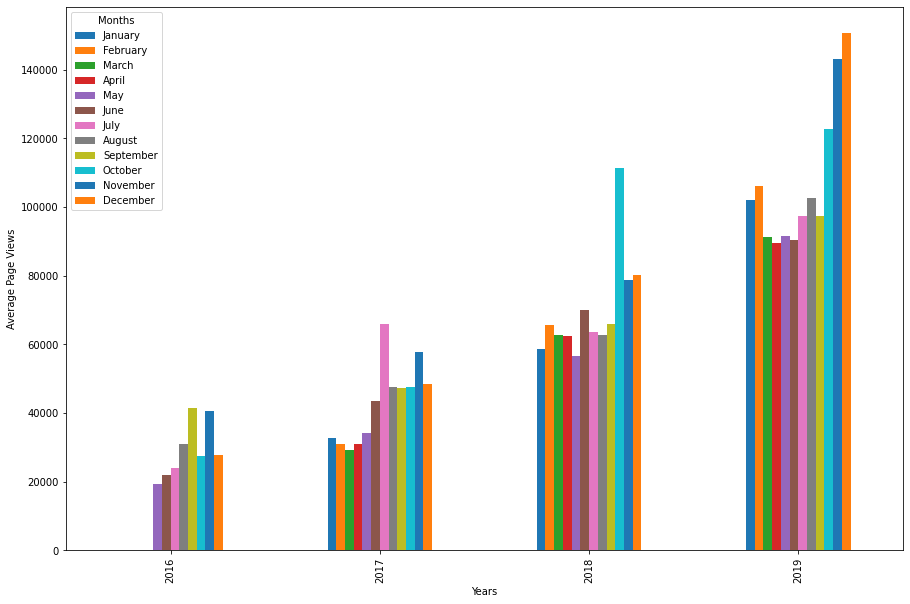

In [100]:
fig2, ax2 = plt.subplots(figsize = (15, 10))
df_bar.unstack().plot(kind='bar', ax = ax2)
ax2.set_xlabel("Years")
ax2.set_ylabel("Average Page Views")
ax2.legend(calendar.month_name[1:], title="Months")

In [ ]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month
   

    df_bar = df_bar.groupby(['year', 'month']).mean()

    # Draw bar plot
    fig, ax = plt.subplots(figsize = (15, 10))
    df_bar.unstack().plot(kind='bar', ax = ax)
    ax.set_xlabel("Years")
    ax.set_ylabel("Average Page Views")
    ax.legend(calendar.month_name[1:], title="Months")

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

In [152]:
df_box = df2.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

d = dict((v,k) for k,v in enumerate(calendar.month_abbr))
df_box['month']= df_box['month'].map(d)

df_box.sort_values(by = ['month'])

,date,value,year,month
210,2017-01-06,37353,2017,1
937,2019-01-06,94108,2019,1
936,2019-01-05,77897,2019,1
935,2019-01-04,94514,2019,1
934,2019-01-03,100710,2019,1
...,...,...,...,...
567,2017-12-29,72819,2017,12
566,2017-12-28,51018,2017,12
565,2017-12-27,43075,2017,12
201,2016-12-28,28424,2016,12


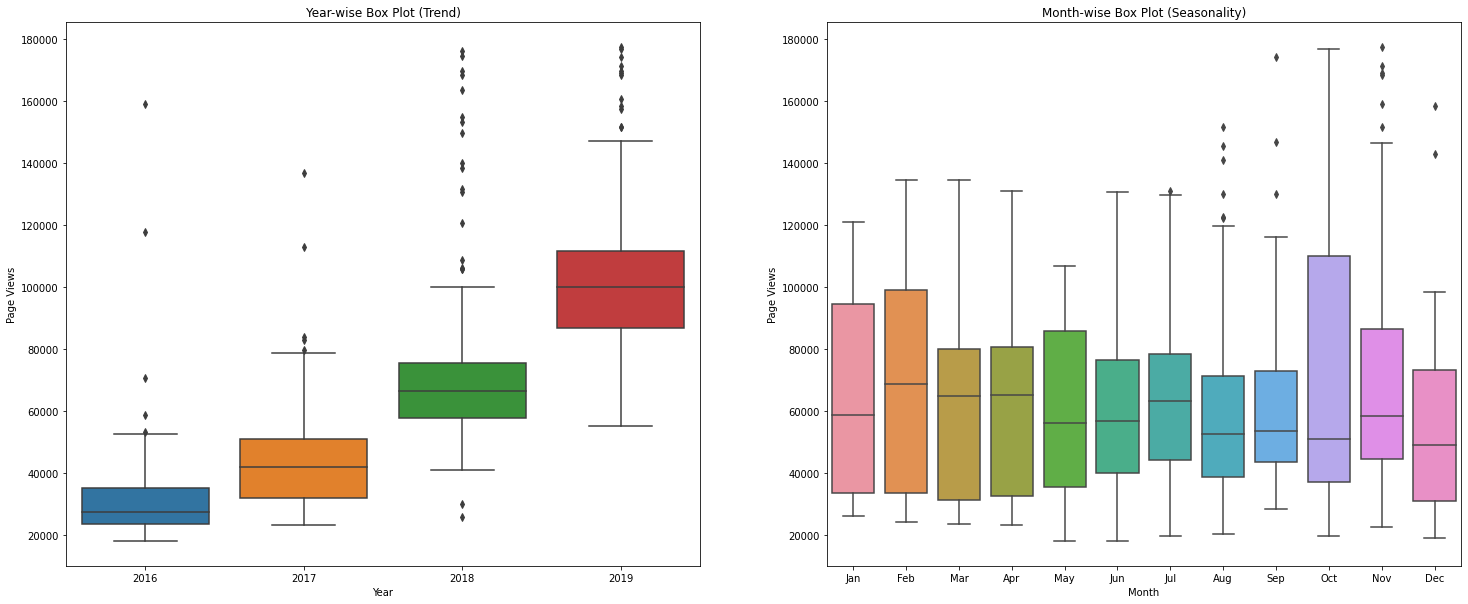

In [154]:
fig, ax = plt.subplots(1,2, figsize = (25, 10))

sns.boxplot(x="year", y="value", data=df_box, ax=ax[0])
sns.boxplot(x="month", y="value", data=df_box, ax=ax[1])

ax[0].set_title('Year-wise Box Plot (Trend)')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Page Views')
ax[1].set_title('Month-wise Box Plot (Seasonality)')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Page Views')
ax[1].set_xticklabels(calendar.month_abbr[1:])


fig.show()

In [ ]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    d = dict((v,k) for k,v in enumerate(calendar.month_abbr))
    df_box['month']= df_box['month'].map(d)

    df_box.sort_values(by = ['month'])

    # Draw box plots (using Seaborn)
    fig, ax = plt.subplots(1,2, figsize = (25, 10))

    sns.boxplot(x="year", y="value", data=df_box, ax=ax[0])
    sns.boxplot(x="month", y="value", data=df_box, ax=ax[1])

    ax[0].set_title('Year-wise Box Plot (Trend)')
    ax[0].set_xlabel('Year')
    ax[0].set_ylabel('Page Views')
    ax[1].set_title('Month-wise Box Plot (Seasonality)')
    ax[1].set_xlabel('Month')
    ax[1].set_ylabel('Page Views')
    ax[1].set_xticklabels(calendar.month_abbr[1:])

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig